In [1]:
import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt
import ugali
from ugali.utils import stats
import pystan
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import importlib
sys.path.append('/data/des81.b/data/tavangar/streams/model_code')

# Node Optimization

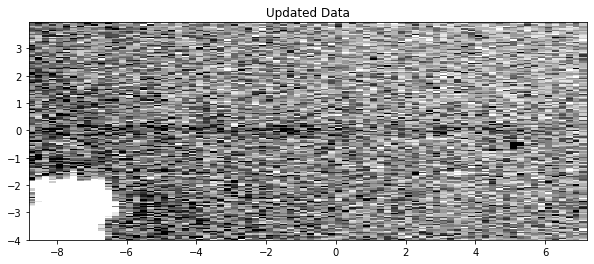

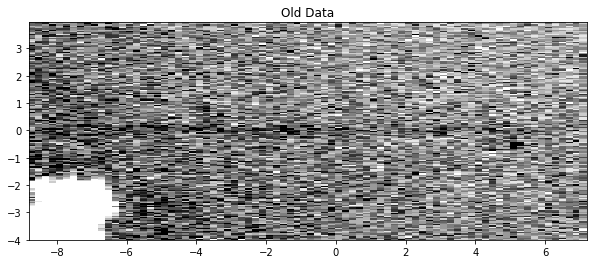

<ipython-input-2-cba495dce456>:22: RuntimeWarning: invalid value encountered in greater
  hh[np.where(hh>16)] = np.nan


In [2]:
stream = 'phoenix_tall'
hh = np.load('phoenix_data_catalogs/phoenix_stream_coord_catalog_paper.npy')
hh = np.transpose(hh)
hh_old=np.load('phoenix_data_catalogs/phoenix_stream_coord_catalog_final.npy')
hh_old = np.transpose(hh_old)
pp1 = np.load('model_arrays/pp1_full_{}.npy'.format(stream))
pp2 = np.load('model_arrays/pp2_full_{}.npy'.format(stream)) 

plt.figure(figsize=(10,4))
plt.pcolormesh(pp1[:,1:-1], pp2[:,1:-1], hh, cmap='gray_r', vmin=0, vmax=10)
plt.title('Updated Data')
plt.show()


plt.figure(figsize=(10,4))
plt.pcolormesh(pp1[:,1:-1], pp2[:,1:-1], hh_old, cmap='gray_r', vmin=0, vmax=10)
plt.title('Old Data')
plt.show()


hh[np.where((hh==0) & (pp1[:,1:-1]<-6))] = np.nan
hh[np.where(hh>16)] = np.nan
hh = hh.astype('int')

### Uniform Stream on Uniform Background as Test

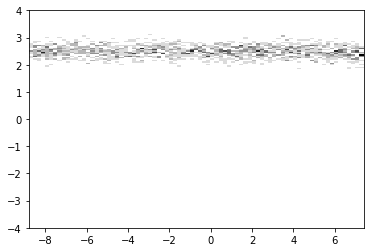

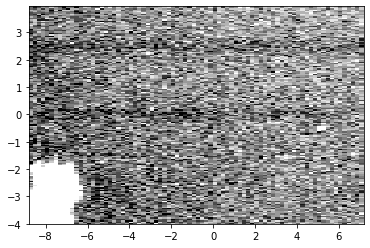

[[-9.22337204e+18 -9.22337204e+18 -9.22337204e+18 ...  4.00000000e+00
   1.00000000e+00  5.00000000e+00]
 [-9.22337204e+18 -9.22337204e+18 -9.22337204e+18 ...  3.00000000e+00
   3.00000000e+00  6.00000000e+00]
 [-9.22337204e+18 -9.22337204e+18 -9.22337204e+18 ...  3.00000000e+00
   4.00000000e+00  3.00000000e+00]
 ...
 [ 6.00000000e+00  7.00000000e+00  4.00000000e+00 ...  5.00000000e+00
   2.00000000e+00  2.00000000e+00]
 [ 6.00000000e+00  9.00000000e+00  7.00000000e+00 ...  6.00000000e+00
   2.00000000e+00  0.00000000e+00]
 [ 6.00000000e+00  4.00000000e+00  6.00000000e+00 ...  3.00000000e+00
   4.00000000e+00  0.00000000e+00]]


In [8]:
phi1_min, phi1_max = -8.8, 7.4 #change for atlas/phoenix
phi2_min, phi2_max = -4, 4
bins = [int((phi1_max - phi1_min) / 0.2), int((phi2_max - phi2_min) / 0.05)]

random_phi1 = np.random.uniform(phi1_min,phi1_max, size=1500)
random_phi2 = np.random.normal(2.5, 0.2, 1500)
plt.hist2d(random_phi1, random_phi2, range = [[phi1_min, phi1_max],[phi2_min, phi2_max]], bins = bins, cmap='gray_r')
plt.show()
random_stream = np.histogram2d(random_phi1, random_phi2, 
                               range = [[phi1_min, phi1_max],[phi2_min, phi2_max]], bins = bins)[0]

plt.pcolormesh(pp1[:,1:-1], pp2[:,1:-1], hh+random_stream.T, cmap='gray_r', vmin = 0, vmax=10)
plt.show()
print(hh+random_stream.T)
np.save('simulated_phoenix_catalog.npy', hh+random_stream.T)

In [3]:
with open("log/phoenix_nodes_paper_final1_results.pkl", "rb") as f:
    data_dict0 = pickle.load(f)
print(data_dict0['best0'])
print(data_dict0['best1'])
print(data_dict0['best2'])
print(data_dict0['best3'])
print(data_dict0['best4'])
print(data_dict0['best5'])
print(data_dict0['best6'])
print(data_dict0['best7'])
print(data_dict0['best8'])
print(data_dict0['best9'])
print(data_dict0['best10'])
print(data_dict0['best11'])
print(data_dict0['best12'])
print(data_dict0['best13'])
print(data_dict0['best14'])



with open("log/phoenix_nodes_paper_final2_results.pkl", "rb") as f:
    data_dict1 = pickle.load(f)
print(data_dict1['best0'])
print(data_dict1['best1'])
print(data_dict1['best2'])
print(data_dict1['best3'])
print(data_dict1['best4'])
print(data_dict1['best5'])
print(data_dict1['best6'])
print(data_dict1['best7'])
print(data_dict1['best8'])
print(data_dict1['best9'])
print(data_dict1['best10'])
print(data_dict1['best11'])
print(data_dict1['best12'])
print(data_dict1['best13'])
print(data_dict1['best14'])

'''
with open("log/phoenix_node_opt3_results.pkl", "rb") as f:
    data_dict2 = pickle.load(f)
print(data_dict2['best0'])
print(data_dict2['best1'])
print(data_dict2['best2'])
print(data_dict2['best3'])
print(data_dict2['best4'])
print(data_dict2['best5'])
print(data_dict2['best6'])
print(data_dict2['best7'])
print(data_dict2['best8'])
print(data_dict2['best9'])
'''
print(np.min(data_dict0['Y0']))
print(np.min(data_dict0['Y1']))
print(np.min(data_dict0['Y2']))
print(np.min(data_dict0['Y3']))
print(np.min(data_dict0['Y4']))
print(np.min(data_dict0['Y5']))
print(np.min(data_dict0['Y6']))
print(np.min(data_dict0['Y7']))
print(np.min(data_dict0['Y8']))
print(np.min(data_dict0['Y9']))
print(np.min(data_dict0['Y10']))
print(np.min(data_dict0['Y11']))
print(np.min(data_dict0['Y12']))
print(np.min(data_dict0['Y13']))
print(np.min(data_dict0['Y14']))

'''
print(np.min(data_dict1['Y0']))
print(np.min(data_dict1['Y1']))
print(np.min(data_dict1['Y2']))
print(np.min(data_dict1['Y3']))
print(np.min(data_dict1['Y4']))
print(np.min(data_dict1['Y5']))
print(np.min(data_dict1['Y6']))
print(np.min(data_dict1['Y7']))
print(np.min(data_dict1['Y8']))
print(np.min(data_dict1['Y9']))

print(np.min(data_dict2['Y0']))
print(np.min(data_dict2['Y1']))
print(np.min(data_dict2['Y2']))
print(np.min(data_dict2['Y3']))
print(np.min(data_dict2['Y4']))
print(np.min(data_dict2['Y5']))
print(np.min(data_dict2['Y6']))
print(np.min(data_dict2['Y7']))
print(np.min(data_dict2['Y8']))
print(np.min(data_dict2['Y9']))
'''
print(' ')

[ 5.  6. 19. 19.  9.  3.]
[ 6.  6. 19. 19.  7.  7.]
[ 5.  5.  5. 19.  7.  5.]
[ 5.  6. 17. 19.  9.  3.]
[ 5.  6.  7. 19.  9.  3.]
[ 5.  5. 19. 19.  6.  8.]
[ 5.  5.  5. 19.  9.  8.]
[ 6.  5.  5. 19.  6.  3.]
[ 5.  5. 10. 19.  9.  9.]
[ 5.  5.  5. 19.  6.  7.]
[ 5.  5.  5. 19.  6.  7.]
[ 5.  6. 16. 19.  6.  7.]
[ 5.  6. 17. 19.  6.  8.]
[ 8.  5. 16. 19.  6.  8.]
[ 5.  6.  5. 19.  6.  3.]
[ 5.  5.  5. 19.  9.  5.]
[ 5.  5.  5. 19.  6.  9.]
[ 5.  5. 16. 19.  9. 23.]
[ 5.  5.  5. 19.  7.  5.]
[ 8.  6. 16. 19.  9.  8.]
[ 5.  5.  5. 19.  9.  3.]
[ 5.  5.  5. 19.  9.  5.]
[ 6.  5.  5. 19.  6.  7.]
[ 6.  5.  5. 19.  6. 20.]
[ 8.  5.  5. 19.  9.  4.]
[ 5.  5. 19. 19.  9.  9.]
[ 5.  6.  5. 19.  9.  5.]
[ 5.  5.  5. 19.  6.  3.]
[ 8.  6. 19. 19.  5.  5.]
[ 5.  5.  5. 19.  7.  9.]
27273.279045245195
27274.8618928927
27276.805978311444
27275.431862592115
27276.128648690887
27275.528288059955
27277.039307412084
27275.66877307092
27280.297752525094
27275.7062426682
27275.7062426682
27274.817476941873

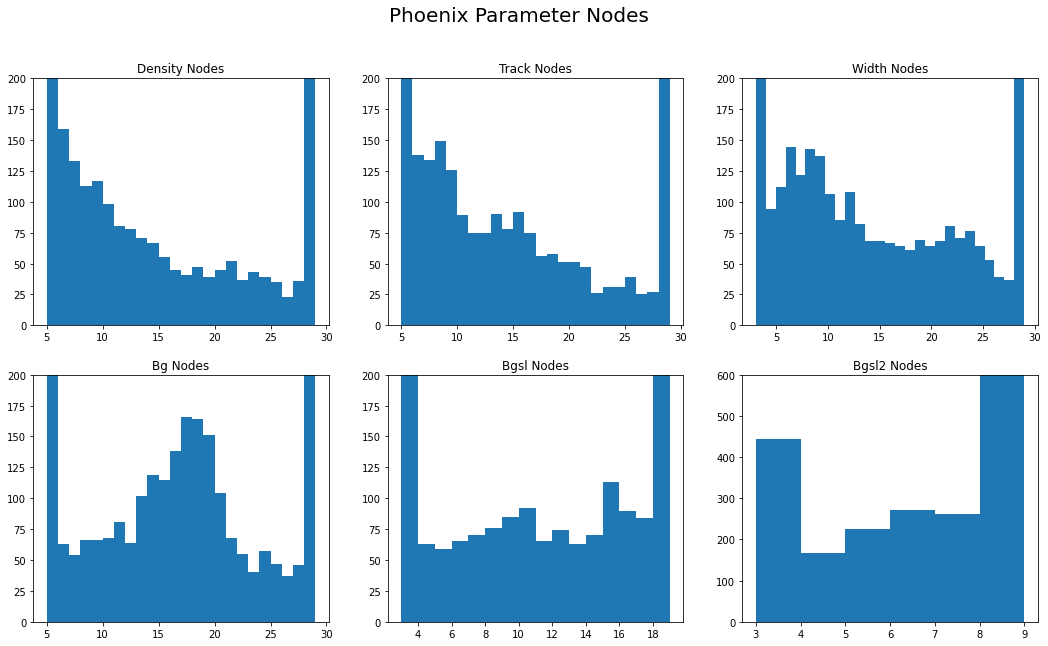

In [4]:
xs=[[ 5,  5,  5, 19,  9,  3,]]
for i in range(15):
    xs = np.append(xs, data_dict0['x{}'.format(i)], axis=0)
    xs = np.append(xs, data_dict1['x{}'.format(i)], axis=0)
    #xs = np.append(xs, data_dict2['x{}'.format(i)], axis=0)

fig, axs = plt.subplots(2,3, figsize=(18,10))

axs[0][0].hist(xs[:,1], bins = 24)
axs[0][0].set_title('Density Nodes')
axs[0][0].set_ylim(0,200)

axs[0][1].hist(xs[:,0], bins = 24)
axs[0][1].set_title('Track Nodes')
axs[0][1].set_ylim(0,200)

axs[0][2].hist(xs[:,5], bins=27)
axs[0][2].set_title('Width Nodes')
axs[0][2].set_ylim(0,200)

axs[1][0].hist(xs[:,2], bins=24)
axs[1][0].set_title('Bg Nodes')
axs[1][0].set_ylim(0,200)

axs[1][1].hist(xs[:,3], bins = 16)
axs[1][1].set_title('Bgsl Nodes')
axs[1][1].set_ylim(0,200)

axs[1][2].hist(xs[:,4], bins = 6)
axs[1][2].set_title('Bgsl2 Nodes')
axs[1][2].set_ylim(0,600)

fig.suptitle('Phoenix Parameter Nodes', fontsize=20)
plt.show()

In [2]:
with open("log/simulated_phoenix_results.pkl", "rb") as f:
    data_dict_sim = pickle.load(f)
print(data_dict_sim['best0'])
print(data_dict_sim['best1'])
print(data_dict_sim['best2'])
print(data_dict_sim['best3'])
print(data_dict_sim['best4'])
print(data_dict_sim['best5'])
print(data_dict_sim['best6'])
print(data_dict_sim['best7'])
print(data_dict_sim['best8'])
print(data_dict_sim['best9'])

print(np.min(data_dict_sim['Y0']))
print(np.min(data_dict_sim['Y1']))
print(np.min(data_dict_sim['Y2']))
print(np.min(data_dict_sim['Y3']))
print(np.min(data_dict_sim['Y4']))
print(np.min(data_dict_sim['Y5']))
print(np.min(data_dict_sim['Y6']))
print(np.min(data_dict_sim['Y7']))
print(np.min(data_dict_sim['Y8']))
print(np.min(data_dict_sim['Y9']))

[ 5.  5.  5.  3.  9. 21.]
[ 5.  5.  5.  3.  9. 25.]
[5. 5. 5. 3. 9. 3.]
[ 5.  5.  8.  3.  9. 10.]
[5. 5. 5. 3. 9. 3.]
[5. 5. 5. 3. 9. 3.]
[5. 5. 5. 3. 9. 3.]
[5. 5. 5. 3. 9. 3.]
[5. 5. 5. 3. 9. 3.]
[5. 5. 5. 3. 9. 3.]
12289.469576427718
12289.14600684063
12289.482470207557
12286.878894848891
12289.482470207557
12289.482470207557
12289.482470207557
12289.482470207557
12289.482470207557
12289.482470207557


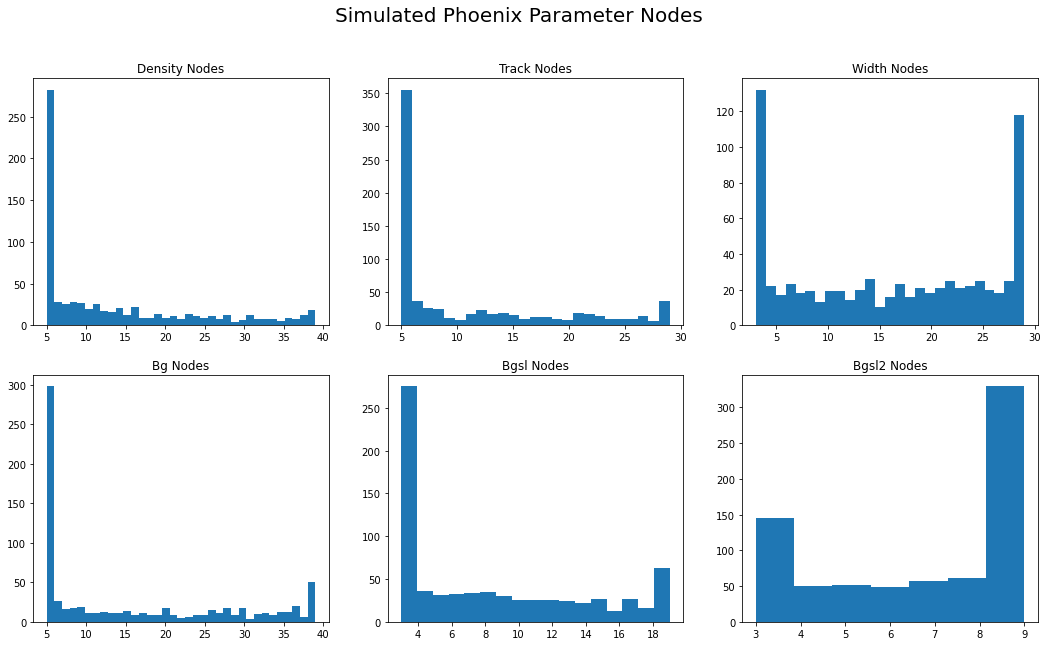

In [4]:
xs=[[5,5,5,3,9,3]]
for i in range(10):
    xs = np.append(xs, data_dict_sim['x{}'.format(i)], axis=0)

fig, axs = plt.subplots(2,3, figsize=(18,10))

axs[0][0].hist(xs[:,1], bins = 35)
axs[0][0].set_title('Density Nodes')

axs[0][1].hist(xs[:,0], bins = 25)
axs[0][1].set_title('Track Nodes')

axs[0][2].hist(xs[:,5], bins=27)
axs[0][2].set_title('Width Nodes')

axs[1][0].hist(xs[:,2], bins=35)
axs[1][0].set_title('Bg Nodes')

axs[1][1].hist(xs[:,3], bins = 17)
axs[1][1].set_title('Bgsl Nodes')

axs[1][2].hist(xs[:,4], bins = 7)
axs[1][2].set_title('Bgsl2 Nodes')

fig.suptitle('Simulated Phoenix Parameter Nodes', fontsize=20)
plt.show()

In [8]:
with open("log/phoenix_paper_flat_results.pkl", "rb") as f:
    data_dict_flat = pickle.load(f)
print(data_dict_flat['best0'])
print(data_dict_flat['best1'])
print(data_dict_flat['best2'])
print(data_dict_flat['best3'])
print(data_dict_flat['best4'])
print(data_dict_flat['best5'])
print(data_dict_flat['best6'])
print(data_dict_flat['best7'])
print(data_dict_flat['best8'])
print(data_dict_flat['best9'])
print(data_dict_flat['best10'])
print(data_dict_flat['best11'])
print(data_dict_flat['best12'])
print(data_dict_flat['best13'])
print(data_dict_flat['best14'])

print(np.min(data_dict_flat['Y0']))
print(np.min(data_dict_flat['Y1']))
print(np.min(data_dict_flat['Y2']))
print(np.min(data_dict_flat['Y3']))
print(np.min(data_dict_flat['Y4']))
print(np.min(data_dict_flat['Y5']))
print(np.min(data_dict_flat['Y6']))
print(np.min(data_dict_flat['Y7']))
print(np.min(data_dict_flat['Y8']))
print(np.min(data_dict_flat['Y9']))

[10.  5. 19.  7.  3.]
[10.  7. 19.  6.  3.]
[10.  5. 19.  6.  3.]
[10.  7. 19.  6.  3.]
[10.  5. 19.  8.  3.]
[11.  5. 19.  8.  3.]
[11.  6. 19.  9.  3.]
[ 6.  7. 19.  9.  3.]
[ 6.  5. 19.  9.  7.]
[11.  5. 19.  9.  3.]
[ 6.  9. 19.  9.  3.]
[10.  5. 19.  9.  3.]
[11.  5. 19.  9.  3.]
[11.  5. 19.  9.  3.]
[11.  5. 19.  7.  3.]
27110.64537337137
27110.43298590293
27110.035177767408
27110.43298590293
27110.973065530914
27111.252895528487
27110.903076221155
27109.2554940777
27110.087777417124
27110.55955223729


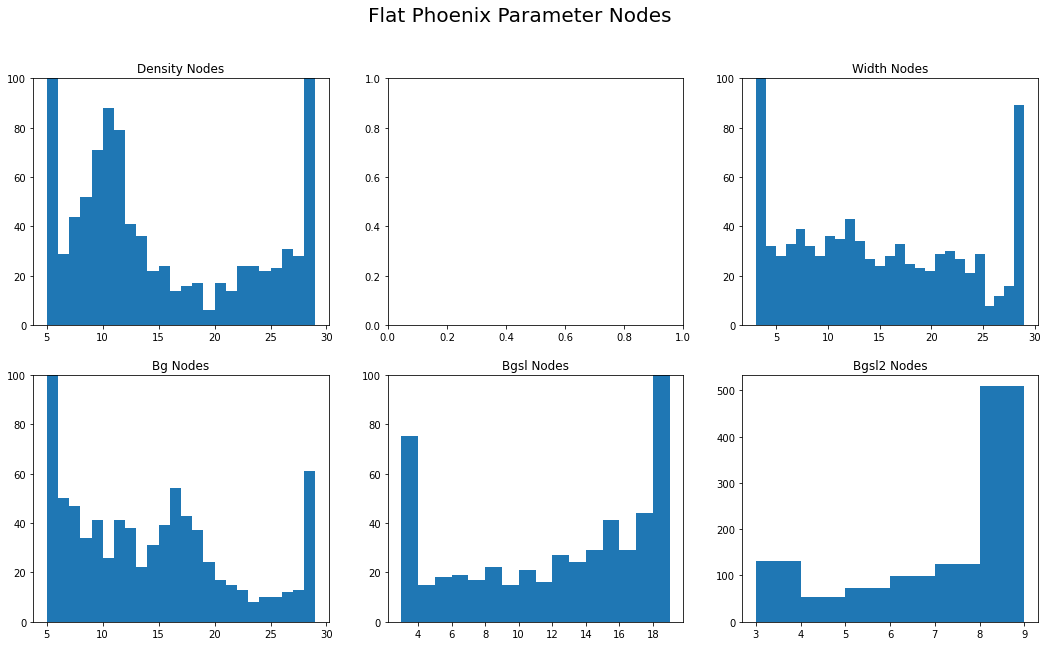

In [17]:
xs=[[5,5,3,9,3]]
for i in range(10):
    xs = np.append(xs, data_dict_flat['x{}'.format(i)], axis=0)

fig, axs = plt.subplots(2,3, figsize=(18,10))

axs[0][0].hist(xs[:,0], bins = 24)
axs[0][0].set_title('Density Nodes')
axs[0][0].set_ylim(0,100)

#axs[0][1].hist(xs[:,0], bins = 25)
#axs[0][1].set_title('Track Nodes')

axs[0][2].hist(xs[:,4], bins=27)
axs[0][2].set_title('Width Nodes')
axs[0][2].set_ylim(0,100)

axs[1][0].hist(xs[:,1], bins=24)
axs[1][0].set_title('Bg Nodes')
axs[1][0].set_ylim(0,100)

axs[1][1].hist(xs[:,2], bins = 16)
axs[1][1].set_title('Bgsl Nodes')
axs[1][1].set_ylim(0,100)

axs[1][2].hist(xs[:,3], bins = 6)
axs[1][2].set_title('Bgsl2 Nodes')

fig.suptitle('Flat Phoenix Parameter Nodes', fontsize=20)
plt.show()

In [10]:
with open("log/atlas_node_opt_results.pkl", "rb") as f:
    data_dict0 = pickle.load(f)
print(data_dict0['best0'])
print(data_dict0['best1'])
print(data_dict0['best2'])
print(data_dict0['best3'])
print(data_dict0['best4'])
print(data_dict0['best5'])
print(data_dict0['best6'])
print(data_dict0['best7'])
print(data_dict0['best8'])
print(data_dict0['best9'])


with open("log/atlas_node_opt2_results.pkl", "rb") as f:
    data_dict1 = pickle.load(f)
print(data_dict1['best0'])
print(data_dict1['best1'])
print(data_dict1['best2'])
print(data_dict1['best3'])
print(data_dict1['best4'])
print(data_dict1['best5'])
print(data_dict1['best6'])
print(data_dict1['best7'])
print(data_dict1['best8'])
print(data_dict1['best9'])


with open("log/atlas_node_opt3_results.pkl", "rb") as f:
    data_dict2 = pickle.load(f)
print(data_dict2['best0'])
print(data_dict2['best1'])
print(data_dict2['best2'])
print(data_dict2['best3'])
print(data_dict2['best4'])
print(data_dict2['best5'])
print(data_dict2['best6'])
print(data_dict2['best7'])
print(data_dict2['best8'])
print(data_dict2['best9'])

print(np.min(data_dict0['Y0']))
print(np.min(data_dict0['Y1']))
print(np.min(data_dict0['Y2']))
print(np.min(data_dict0['Y3']))
print(np.min(data_dict0['Y4']))
print(np.min(data_dict0['Y5']))
print(np.min(data_dict0['Y6']))
print(np.min(data_dict0['Y7']))
print(np.min(data_dict0['Y8']))
print(np.min(data_dict0['Y9']))
print(np.min(data_dict1['Y0']))
print(np.min(data_dict1['Y1']))
print(np.min(data_dict1['Y2']))
print(np.min(data_dict1['Y3']))
print(np.min(data_dict1['Y4']))
print(np.min(data_dict1['Y5']))
print(np.min(data_dict1['Y6']))
print(np.min(data_dict1['Y7']))
print(np.min(data_dict1['Y8']))
print(np.min(data_dict1['Y9']))
print(np.min(data_dict2['Y0']))
print(np.min(data_dict2['Y1']))
print(np.min(data_dict2['Y2']))
print(np.min(data_dict2['Y3']))
print(np.min(data_dict2['Y4']))
print(np.min(data_dict2['Y5']))
print(np.min(data_dict2['Y6']))
print(np.min(data_dict2['Y7']))
print(np.min(data_dict2['Y8']))
print(np.min(data_dict2['Y9']))

[29. 29. 10.  9.  7.]
[12. 11. 10.  6.  5.]
[10. 15. 14.  9.  7.]
[11. 15. 18.  9.  7.]
[19. 14. 20.  9.  4.]
[12. 11. 15.  5.  9.]
[ 5. 15. 10.  9.  7.]
[10. 14. 10.  5.  7.]
[10. 14. 10.  7.  6.]
[ 9. 14. 18.  9.  7.]
[ 9. 14. 14.  6.  9.]
[15. 36. 15.  9.  9.]
[10. 15. 18.  5.  9.]
[15. 39. 12.  9.  4.]
[15. 11.  5.  6.  8.]
[11. 11. 20.  5.  9.]
[10. 14. 13.  9.  7.]
[ 5. 33. 10.  9.  9.]
[15. 33. 14.  9.  9.]
[10. 14. 13.  9.  9.]
[16. 17. 10.  9.  8.]
[ 8. 14. 14.  5.  9.]
[12. 11. 20.  9.  9.]
[27. 14. 20.  5.  9.]
[ 9. 11. 10.  9.  9.]
[ 9. 14.  8.  5.  8.]
[10. 14. 13.  5.  7.]
[15. 30. 13.  9.  8.]
[15. 11.  7.  5.  9.]
[12. 11.  9.  6.  8.]
39420.795632609515
39412.537460189065
39412.76642989336
39415.56813492338
39421.09177998555
39409.590592920315
39415.02899150245
39409.35859557564
39413.65655272046
39415.29337740794
39413.70525259947
39417.60157748863
39414.461651128455
39416.27290444095
39414.60755185259
39410.40713047381
39411.233492700936
39418.51178108271
39414.12626

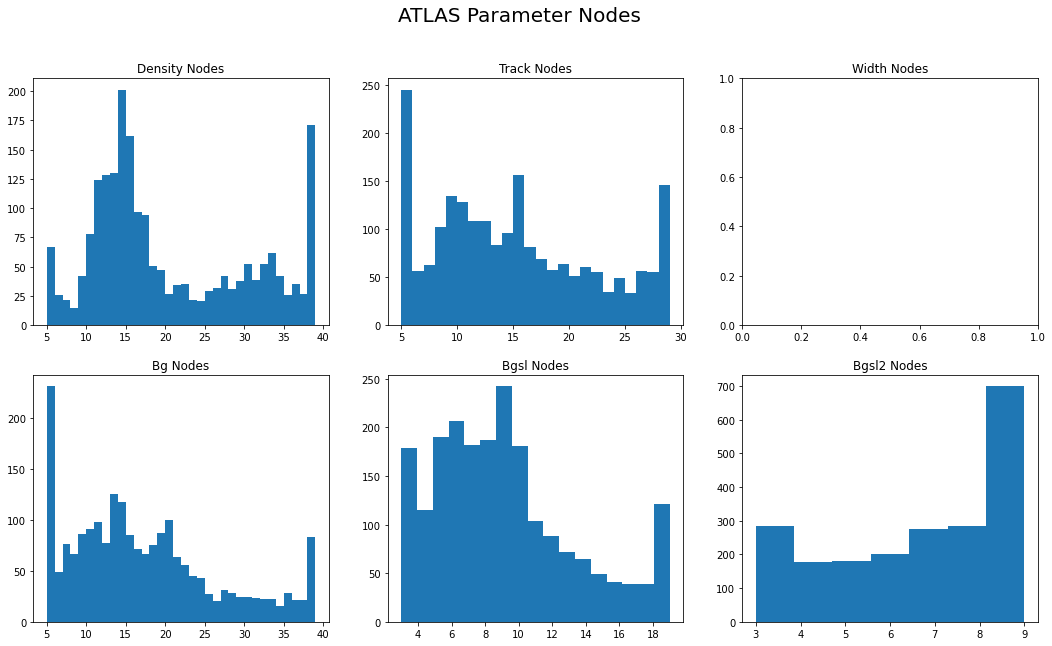

In [11]:
xs=[[29,29,10,9,7]]
for i in range(10):
    xs = np.append(xs, data_dict0['x{}'.format(i)], axis=0)
    xs = np.append(xs, data_dict1['x{}'.format(i)], axis=0)
    xs = np.append(xs, data_dict2['x{}'.format(i)], axis=0)

fig, axs = plt.subplots(2,3, figsize=(18,10))

axs[0][0].hist(xs[:,1], bins = 34)
axs[0][0].set_title('Density Nodes')
#axs[0][0].plot([14,14], [0,200])

axs[0][1].hist(xs[:,0], bins = 24)
axs[0][1].set_title('Track Nodes')

#axs[0][2].hist(xs[:,5], bins=27)
axs[0][2].set_title('Width Nodes')

axs[1][0].hist(xs[:,2], bins=34)
axs[1][0].set_title('Bg Nodes')
#axs[1][0].plot([14,14], [0,200])

axs[1][1].hist(xs[:,3], bins = 17)
axs[1][1].set_title('Bgsl Nodes')

axs[1][2].hist(xs[:,4], bins = 7)
axs[1][2].set_title('Bgsl2 Nodes')

fig.suptitle('ATLAS Parameter Nodes', fontsize=20)
plt.show()

# Model Extraction

In [3]:
test_extract = 7
print('open model')
with open("phoenix_models/phoenix_model_fit_final_test{}.pickle".format(test_extract), "rb") as f:
    data_dict = pickle.load(f)

fit = data_dict['fit']

open model


In [4]:
#phoenix stream
hh = np.load('phoenix_data_catalogs/phoenix_stream_coord_catalog_paper.npy')
hh = np.transpose(hh)
pp1 = np.load('model_arrays/pp1_full_phoenix_tall.npy')
pp1 = pp1[:,1:-1]
pp2 = np.load('model_arrays/pp2_full_phoenix_tall.npy') 
pp2 = pp2[:,1:-1]
hh[np.where((hh==0) & (pp1<-6))] = np.nan
hh[np.where(hh>16)] = np.nan
hh = hh.astype('int')
vv_mask=hh
mask = hh > -1

smooth_full = np.load('model_arrays/smooth_full_phoenix_tall.npy')[:,1:-1]

<ipython-input-4-7fd1f3ab6a12>:9: RuntimeWarning: invalid value encountered in greater
  hh[np.where(hh>16)] = np.nan


In [5]:
print('Getting model values ...')
xmod = fit['xmod']
print(len(xmod[0]))
xmod_2d_peak = np.zeros(pp1.shape)
xmod_2d_std_lo = np.zeros(pp1.shape)
xmod_2d_std_hi = np.zeros(pp1.shape)

xmod_interval = np.apply_along_axis(stats.peak_interval, 0, xmod)

xmod_2d_peak[mask] = xmod_interval[0,:]
xmod_2d_lo = []
xmod_2d_hi = []
for i in range(len(xmod_interval[1,:])):
    xmod_2d_lo = np.append(xmod_2d_lo, np.asarray(xmod_interval[1,:][i])[0])
    xmod_2d_hi = np.append(xmod_2d_hi, np.asarray(xmod_interval[1,:][i])[1])
xmod_2d_std_lo[mask] = xmod_2d_lo
xmod_2d_std_hi[mask] = xmod_2d_hi

xmod_2d_peak = xmod_2d_peak.astype('float64')
model_map = np.e**xmod_2d_peak

Getting model values ...
12611


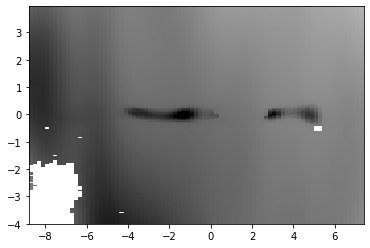

In [6]:
plt.pcolormesh(pp1, pp2, model_map, vmax = 8, cmap = 'gray_r')

In [ ]:
importlib.reload(stats)
print('Getting Stream Intensity means ...')
logint_pix = fit['logint_pix']

logint_pix_peak = np.zeros(pp1.shape)
logint_pix_std_lo = np.zeros(pp1.shape)
logint_pix_std_hi = np.zeros(pp1.shape)

logint_pix_interval = np.apply_along_axis(stats.peak_interval, 0, logint_pix)

logint_pix_peak[mask] = logint_pix_interval[0,:]


logint_mean = logint_pix_peak.astype('float64')
int_map_log = np.array(logint_mean).reshape(pp1.shape)
int_map = np.e**int_map_log

In [8]:
print('Getting Background Intensity means ...')
logbg_pix = fit['logbg_pix']
logbg_pix_peak = np.zeros(pp1.shape)
logbg_pix_std_lo = np.zeros(pp1.shape)
logbg_pix_std_hi = np.zeros(pp1.shape)

logbg_pix_interval = np.apply_along_axis(stats.peak_interval, 0, logbg_pix)

logbg_pix_peak[mask] = logbg_pix_interval[0,:]

logbg_mean = logbg_pix_peak.astype('float64')
bg_map_log = np.array(logbg_mean).reshape(pp1.shape)
bg_map = np.e**bg_map_log

Getting Background Intensity means ...


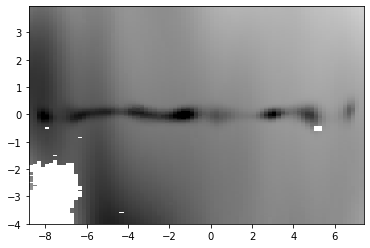

In [9]:
plt.pcolormesh(pp1, pp2, int_map+bg_map, vmax = 8, cmap = 'gray_r')

In [10]:
print("Getting Width means ...")

width_val = fit['width_val']
widthval_peak = np.zeros(pp1.shape)
widthval_std_lo = np.zeros(pp1.shape)
widthval_std_hi = np.zeros(pp1.shape)

widthval_interval = np.apply_along_axis(stats.peak_interval, 0, width_val)

widthval_peak[mask] = widthval_interval[0,:]
widthval_lo = []
widthval_hi = []
for i in range(len(widthval_interval[1,:])):
    widthval_lo = np.append(widthval_lo, np.asarray(widthval_interval[1,:][i])[0])
    widthval_hi = np.append(widthval_hi, np.asarray(widthval_interval[1,:][i])[1])
widthval_std_lo[mask] = widthval_lo
widthval_std_hi[mask] = widthval_hi


wid_mean = widthval_peak.astype('float64')
width_map = np.array(wid_mean).reshape(pp1.shape)
width_hi_map = widthval_std_hi
width_lo_map = widthval_std_lo

Getting Width means ...


In [ ]:
print("Getting Phi 2 means ...")

fi2_val = fit['fi2_val']
fi2val_peak = np.zeros(pp1.shape)
fi2val_std_lo = np.zeros(pp1.shape)
fi2val_std_hi = np.zeros(pp1.shape)

fi2val_interval = np.apply_along_axis(stats.peak_interval, 0, fi2_val)

fi2val_peak[mask] = fi2val_interval[0,:]
fi2val_lo = []
fi2val_hi = []
for i in range(len(fi2val_interval[1,:])):
    fi2val_lo = np.append(fi2val_lo, np.asarray(fi2val_interval[1,:][i])[0])
    fi2val_hi = np.append(fi2val_hi, np.asarray(fi2val_interval[1,:][i])[1])
fi2val_std_lo[mask] = fi2val_lo
fi2val_std_hi[mask] = fi2val_hi

phi2_mean = fi2val_peak.astype('float64')
fi2_map = np.array(phi2_mean).reshape(pp1.shape)
fi2_hi_map = fi2val_std_hi
fi2_lo_map = fi2val_std_lo

In [19]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_6f747e7a9882c4b063c5130b2cd93ac0.
12 chains, each with iter=5000; warmup=2000; thin=1; 
post-warmup draws per chain=3000, total post-warmup draws=36000.

                 mean se_mean     sd    2.5%    25%     50%     75%  97.5%  n_eff   Rhat
log_ints[1]      0.73    0.02   2.65   -2.85  -1.46    0.25    2.48   6.63  18143    1.0
log_ints[2]      0.47    0.03   2.34   -2.88  -1.71    0.17    2.83   4.12   7439    1.0
log_ints[3]      2.32    0.02   1.16   -1.13   1.94    2.62    3.07   3.68   3998    1.0
log_ints[4]      3.09    0.02   0.98    0.14   2.83    3.31    3.67   4.18   2471    1.0
log_ints[5]      3.11    0.03   1.24   -1.25   2.98    3.47    3.79   4.24   1917   1.01
log_ints[6]      2.76    0.03   1.21   -0.99   2.44    3.09    3.52   4.09   1883   1.01
log_ints[7]      3.91  4.4e-3   0.36    3.14   3.71    3.94    4.15    4.5   6779    1.0
log_ints[8]      3.75  3.1e-3   0.35    2.95   3.54    3.

In [4]:
fi2_nodes = np.apply_along_axis(stats.peak_interval, 0, fit['fi2s'])
print(fi2_nodes)

[[-0.11722877185228414 -0.07712241625636918 -0.015958208935492296
  0.06523656557189184 0.08445025470930698 -0.061739446633137185
  -0.0014652403069766173 -0.04295089663403093 0.06997932041120891
  -0.059582484672643016 0.1007197398579319 -0.0432633277680983
  0.0346363550605453 0.11323139101210555]
 [list([-0.3709784023379923, 0.23781979406741804])
  list([-0.233547724960243, 0.16760583976417864])
  list([-0.09374033805026338, 0.05233008136759132])
  list([-0.002120445174192076, 0.12667880560680778])
  list([0.04061177631940893, 0.13533206537150022])
  list([-0.10111122933055139, -0.018836966091970386])
  list([-0.028844402974720795, 0.034155891567353325])
  list([-0.11790322632956685, 0.011805114314760057])
  list([-0.054701068029535116, 0.17423356095839315])
  list([-0.10456415382120354, -0.011784732786690677])
  list([0.05862241367951526, 0.14052943975108068])
  list([-0.09962900494129845, 0.0061457531151841716])
  list([-0.18187802540105302, 0.19137366161459735])
  list([-0.218516

In [ ]:
print("Getting Log Intensity means ...")

logint_val = fit['logint_val']
logint1d_peak = np.zeros(pp1.shape)
logint1d_std_lo = np.zeros(pp1.shape)
logint1d_std_hi = np.zeros(pp1.shape)

logint1d_interval = np.apply_along_axis(stats.peak_interval, 0, logint_val)

logint1d_lo = []
logint1d_hi = []
for i in range(len(logint1d_interval[1,:])):
    logint1d_lo = np.append(logint1d_lo, np.asarray(logint1d_interval[1,:][i])[0])
    logint1d_hi = np.append(logint1d_hi, np.asarray(logint1d_interval[1,:][i])[1])
    if logint1d_interval[0][i] > np.asarray(logint1d_interval[1,:][i])[1]:
        logint1d_interval[0][i] = np.log(0.5*(np.e**np.asarray(logint1d_interval[1,:][i])[0] + 
                                              np.e**np.asarray(logint1d_interval[1,:][i])[1]))
#see if i can fix this in a better way for the final version
logint1d_std_lo[mask] = logint1d_lo
logint1d_std_hi[mask] = logint1d_hi
logint1d_peak[mask] = logint1d_interval[0,:]

int1d_mean = logint1d_peak.astype('float64')
int1d_map_log = np.array(int1d_mean).reshape(pp1.shape)
int1d_map = np.e**int1d_map_log
logint1d_hi_map = logint1d_std_hi
logint1d_lo_map = logint1d_std_lo
int1d_hi_map = np.e**logint1d_hi_map
int1d_lo_map = np.e**logint1d_lo_map

np.save('model_arrays/phoenix_int1d_map_final_test7.npy', int1d_map)
np.save('model_arrays/phoenix_int1d_hi_map_final_test7.npy', int1d_hi_map)
np.save('model_arrays/phoenix_int1d_lo_map_final_test7.npy', int1d_lo_map)

Getting Log Intensity means ...


In [13]:
track = fit['fi2s']
track_nodes = np.apply_along_axis(stats.peak_interval, 0, fit['fi2s'])
print(track_nodes[0])

[-0.10518882032849447 -0.09353363255443203 -0.021347581533551596
 0.06627531425835542 0.07308068815230284 -0.04905011384106034
 -0.006376272051494061 -0.032319691835023034 0.04774871819712179
 -0.07668964915445091 0.0945308316014547 -0.07064416851649902
 0.04310879201496365 0.0951785518739463]


In [15]:
track_nodes_lo, track_nodes_hi, track2_nodes = [], [], []
for i in range(len(track_nodes[0])):
    track_nodes_lo = np.append(track_nodes_lo, np.asarray(track_nodes[1,:][i])[0])
    track_nodes_hi = np.append(track_nodes_hi, np.asarray(track_nodes[1,:][i])[1])
    track2_nodes = np.append(track2_nodes, np.asarray(track_nodes[0][i]))
track2_nodes

array([-0.10518882, -0.09353363, -0.02134758,  0.06627531,  0.07308069,
       -0.04905011, -0.00637627, -0.03231969,  0.04774872, -0.07668965,
        0.09453083, -0.07064417,  0.04310879,  0.09517855])

In [15]:
np.linspace(-9.1,7.5, 14)

array([-9.1       , -7.82307692, -6.54615385, -5.26923077, -3.99230769,
       -2.71538462, -1.43846154, -0.16153846,  1.11538462,  2.39230769,
        3.66923077,  4.94615385,  6.22307692,  7.5       ])

In [12]:
track_nodes[0]

IndexError: list index out of range

In [7]:
np.asarray(track_nodes[0])

array([-0.10518882032849447, -0.09353363255443203, -0.021347581533551596,
       0.06627531425835542, 0.07308068815230284, -0.04905011384106034,
       -0.006376272051494061, -0.032319691835023034, 0.04774871819712179,
       -0.07668964915445091, 0.0945308316014547, -0.07064416851649902,
       0.04310879201496365, 0.0951785518739463], dtype=object)

In [16]:
np.save('phoenix_track.npy', track2_nodes)
#np.save('phoenix_track_lo.npy', track_nodes_lo)
#np.save('phoenix_track_hi.npy', track_nodes_hi)
#np.save('phoenix_track_phi1.npy', np.linspace(-9.1,7.5, 14))

In [17]:
p2 = np.load('phoenix_track.npy')
p2

array([-0.10518882, -0.09353363, -0.02134758,  0.06627531,  0.07308069,
       -0.04905011, -0.00637627, -0.03231969,  0.04774872, -0.07668965,
        0.09453083, -0.07064417,  0.04310879,  0.09517855])

In [8]:
logint1d_test = np.zeros(pp1.shape)
logint1d_test[mask] = logint

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [14]:
len(pp1[mask])

12453

In [48]:
fit['coeffs_int'].shape

(36000, 20)

In [5]:
all_log_int = fit['logint_val']
all_log_int

array([[ 3.40014102,  3.52923533,  3.60133081, ...,  2.63606594,
         2.4997715 ,  2.3159028 ],
       [ 4.0655641 ,  3.84468381,  3.45848492, ..., -0.35508314,
         0.30660718,  1.20961812],
       [ 3.19681706,  3.31327925,  3.33593023, ...,  2.6593918 ,
         1.54351533,  0.06060146],
       ...,
       [ 3.93231515,  3.84450052,  3.57137952, ...,  1.24063546,
         1.5093018 ,  1.5486568 ],
       [ 4.06433304,  4.06929874,  3.68948542, ...,  2.36659803,
         1.9195391 ,  1.24831462],
       [ 3.85394176,  4.21886132,  4.40475273, ...,  2.13599707,
         1.29722248, -0.16780319]])

897
0.024916666666666667


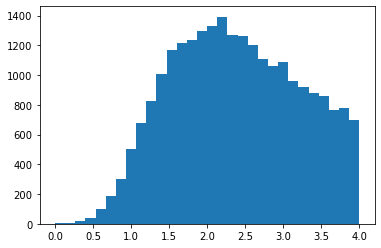

In [6]:
phi1_left = np.e**all_log_int[:,12446]
phi1_peak = np.e**all_log_int[:,12440]
phi1_right = np.e**all_log_int[:,12436]
S = (2*phi1_peak) / (1.2*phi1_left + 0.8*phi1_right)
len(S)
plt.hist(S, range=[0,4], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

81
0.00225


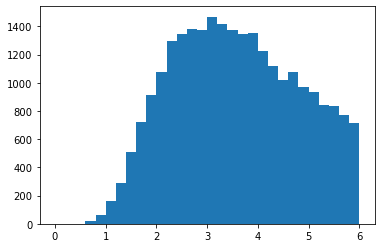

In [7]:
phi1_left = np.e**all_log_int[:,12436]
phi1_peak = np.e**all_log_int[:,12431]
phi1_right = np.e**all_log_int[:,12424]
S = (2.4*phi1_peak) / (1*phi1_left + 1.4*phi1_right)
plt.hist(S, range=[0,6], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

960
0.02666666666666667


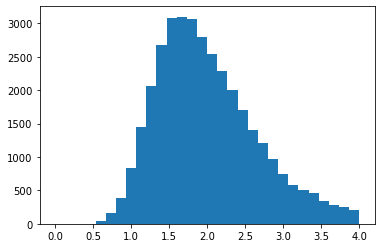

In [8]:
phi1_left = np.e**all_log_int[:,12412]
phi1_peak = np.e**all_log_int[:,12408]
phi1_right = np.e**all_log_int[:,12404]
S = (1.6*phi1_peak) / (0.8*phi1_left + 0.8*phi1_right)
plt.hist(S, range=[0,4], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

35933
0.9981388888888889


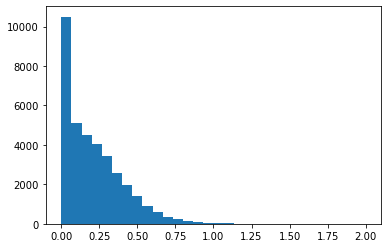

In [9]:
phi1_left = np.e**all_log_int[:,12431]
phi1_trough = np.e**all_log_int[:,12422]
phi1_right = np.e**all_log_int[:,12412]
S = (3.8*phi1_trough) / (1.8*phi1_left + 2*phi1_right)
plt.hist(S, range=[0,2], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

In [10]:
print(pp1[mask][12427], pp1[mask][12422], pp1[mask][12411])

2.1999999999999993 1.1999999999999993 -1.0000000000000009


[ 1  6 14 16 20 24 29 32 39 55 62 64 71] [-8.6 -7.6 -6.  -5.6 -4.8 -4.  -3.  -2.4 -1.   2.2  3.6  4.   5.4]


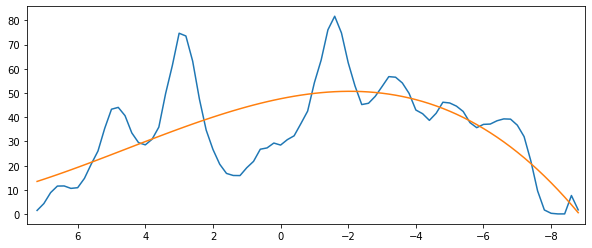

In [11]:
int1d_map = np.load('model_arrays/phoenix_int1d_map_final_test{}.npy'.format(7))
#plt.plot(np.linspace(-9,7.4, len(logint_nodes[0])), np.e**logint_nodes[0])
plt.figure(figsize=(10,4))
plt.plot(pp1[80],int1d_map[80])
pcoefs=np.polyfit(pp1[80],int1d_map[80],3)
pfit=np.poly1d(pcoefs)
polydat=pfit(pp1[80])
plt.plot(pp1[80], polydat)
plt.xlim(7.5, -9)
idx = np.argwhere(np.diff(np.sign(polydat - int1d_map[80]))).flatten()
print(idx, pp1[80][idx])

3373
0.09369444444444444


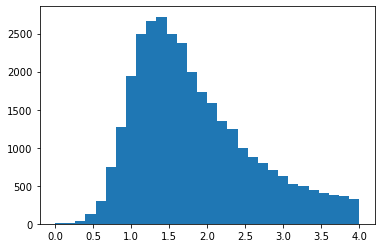

In [12]:
# peak at phi1=5
phi1_left = np.e**all_log_int[:,12443]
phi1_peak = np.e**all_log_int[:,12440]
phi1_right = np.e**all_log_int[:,12436]
S = (1.4*phi1_peak) / (0.8*phi1_left + 0.6*phi1_right)
len(S)
plt.hist(S, range=[0,4], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

212
0.005888888888888889


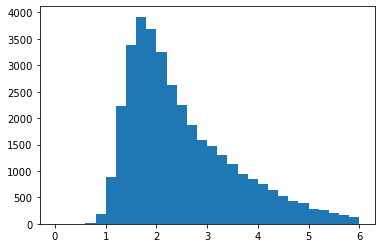

In [13]:
#peak at phi1=3
phi1_left = np.e**all_log_int[:,12434]
phi1_peak = np.e**all_log_int[:,12431]
phi1_right = np.e**all_log_int[:,12427]
S = (1.4*phi1_peak) / (0.8*phi1_left + 0.6*phi1_right)
plt.hist(S, range=[0,6], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

1410
0.03916666666666667


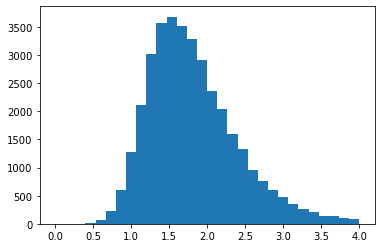

In [14]:
#peak at phi1=-1.5 
phi1_left = np.e**all_log_int[:,12411]
phi1_peak = np.e**all_log_int[:,12408]
phi1_right = np.e**all_log_int[:,12404]
S = (1.4*phi1_peak) / (0.6*phi1_left + 0.8*phi1_right)
plt.hist(S, range=[0,4], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

35742
0.0071666666666666545


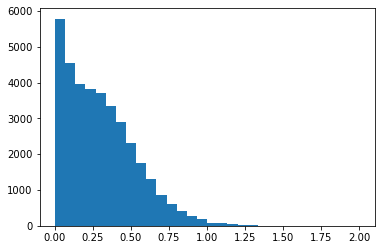

In [15]:
#big trough
phi1_left = np.e**all_log_int[:,12427]
phi1_trough = np.e**all_log_int[:,12422]
phi1_right = np.e**all_log_int[:,12411]
S = (3.2*phi1_trough) / (2.2*phi1_left + 1*phi1_right)
plt.hist(S, range=[0,2], bins=30)
print(len(np.where(S < 1)[0]))
print(1- len(np.where(S < 1)[0]) / len(S))

7341
0.20391666666666666


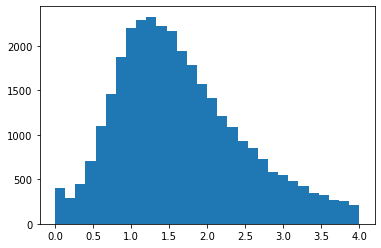

In [17]:
#trough -2.5
phi1_left = np.e**all_log_int[:,12386]
phi1_peak = np.e**all_log_int[:,12382]
phi1_right = np.e**all_log_int[:,12378]
S = (1.6*phi1_peak) / (0.8*phi1_left + 0.8*phi1_right)
plt.hist(S, range=[0,4], bins=30)
print(len(np.where(S < 1)[0]))
print(len(np.where(S < 1)[0]) / len(S))

### Saving data
So that it can be loaded in the future

In [14]:
test_save = '2'
np.save('model_arrays/phoenix_model_map_test{}.npy'.format(test_save), model_map)
np.save('model_arrays/phoenix_int1d_map_test{}.npy'.format(test_save), int1d_map)
np.save('model_arrays/phoenix_int1d_hi_map_test{}.npy'.format(test_save), int1d_hi_map)
np.save('model_arrays/phoenix_int1d_lo_map_test{}.npy'.format(test_save), int1d_lo_map)
np.save('model_arrays/phoenix_int_map_test{}.npy'.format(test_save), int_map)
np.save('model_arrays/phoenix_bkg_map_test{}.npy'.format(test_save), bg_map)
np.save('model_arrays/phoenix_width_map_test{}.npy'.format(test_save), width_map)
np.save('model_arrays/phoenix_width_hi_map_test{}.npy'.format(test_save), width_hi_map)
np.save('model_arrays/phoenix_width_lo_map_test{}.npy'.format(test_save), width_lo_map)
np.save('model_arrays/phoenix_fi2_map_test{}.npy'.format(test_save), fi2_map)
np.save('model_arrays/phoenix_fi2_hi_map_test{}.npy'.format(test_save), fi2_hi_map)
np.save('model_arrays/phoenix_fi2_lo_map_test{}.npy'.format(test_save), fi2_lo_map)

# Loading
If already extracted all model data

In [39]:
#phoenix stream
hh = np.load('phoenix_data_catalogs/phoenix_stream_coord_catalog_paper.npy')
hh = np.transpose(hh)
pp1 = np.load('model_arrays/pp1_full_phoenix_tall.npy')
pp1 = pp1[:,1:-1]
pp2 = np.load('model_arrays/pp2_full_phoenix_tall.npy') 
pp2 = pp2[:,1:-1]
hh[np.where((hh==0) & (pp1<-6))] = np.nan
hh[np.where(hh>16)] = np.nan
hh = hh.astype('int')
vv_mask=hh
mask = hh > -1

smooth_full = np.load('model_arrays/smooth_full_phoenix_tall.npy')[:,1:]

<ipython-input-39-afa4e53fca84>:9: RuntimeWarning: invalid value encountered in greater
  hh[np.where(hh>16)] = np.nan


In [4]:
test_load = '6'

vv_mask_full = np.load('model_arrays/vv_mask_full_phoenix_tall.npy')[:,1:-1]
smooth_full = np.load('model_arrays/smooth_full_phoenix_tall.npy')[:,1:-1]

model_map = np.load('model_arrays/phoenix_model_map_final_test{}.npy'.format(test_load))
int_map = np.load('model_arrays/phoenix_int_map_final_test{}.npy'.format(test_load))
int1d_map = np.load('model_arrays/phoenix_int1d_map_final_test{}.npy'.format(test_load))
int1d_hi_map = np.load('model_arrays/phoenix_int1d_hi_map_final_test{}.npy'.format(test_load))
int1d_lo_map = np.load('model_arrays/phoenix_int1d_lo_map_final_test{}.npy'.format(test_load))
bg_map = np.load('model_arrays/phoenix_bkg_map_final_test{}.npy'.format(test_load))
width_map = np.load('model_arrays/phoenix_width_map_final_test{}.npy'.format(test_load))
width_hi_map = np.load('model_arrays/phoenix_width_hi_map_final_test{}.npy'.format(test_load))
width_lo_map = np.load('model_arrays/phoenix_width_lo_map_final_test{}.npy'.format(test_load))
fi2_map = np.load('model_arrays/phoenix_fi2_map_final_test{}.npy'.format(test_load))
fi2_hi_map = np.load('model_arrays/phoenix_fi2_hi_map_final_test{}.npy'.format(test_load))
fi2_lo_map = np.load('model_arrays/phoenix_fi2_lo_map_final_test{}.npy'.format(test_load))

In [5]:
int1d_opt = np.load('model_arrays/phoenix_opt_nodes_int1d_2.npy')
width_opt = np.load('model_arrays/phoenix_opt_nodes_width_2.npy')
fi2_opt = np.load('model_arrays/phoenix_opt_nodes_fi2_2.npy')

# Plotting

In [6]:
def plot_pretty(dpi=175, fontsize=15, labelsize=15, figsize=(10, 8), tex=True):
    # import pyplot and set some parameters to make plots prettier
    plt.rc('savefig', dpi=dpi)
    plt.rc('text', usetex=tex)
    plt.rc('font', size=fontsize)
    plt.rc('xtick.major', pad=1)
    plt.rc('xtick.minor', pad=1)
    plt.rc('ytick.major', pad=1)
    plt.rc('ytick.minor', pad=1)
    plt.rc('figure', figsize=figsize)
    mpl.rcParams['xtick.labelsize'] = labelsize
    mpl.rcParams['ytick.labelsize'] = labelsize
    mpl.rcParams.update({'figure.autolayout': False})
    
plot_pretty(fontsize=15)

In [7]:
int_map=int1d_map[80] * width_map[80] * np.sqrt(1/(2*np.pi)) * np.e**(-0.5 * ((pp2 - fi2_map[80])/(width_map[80]))**2)

Plotting...


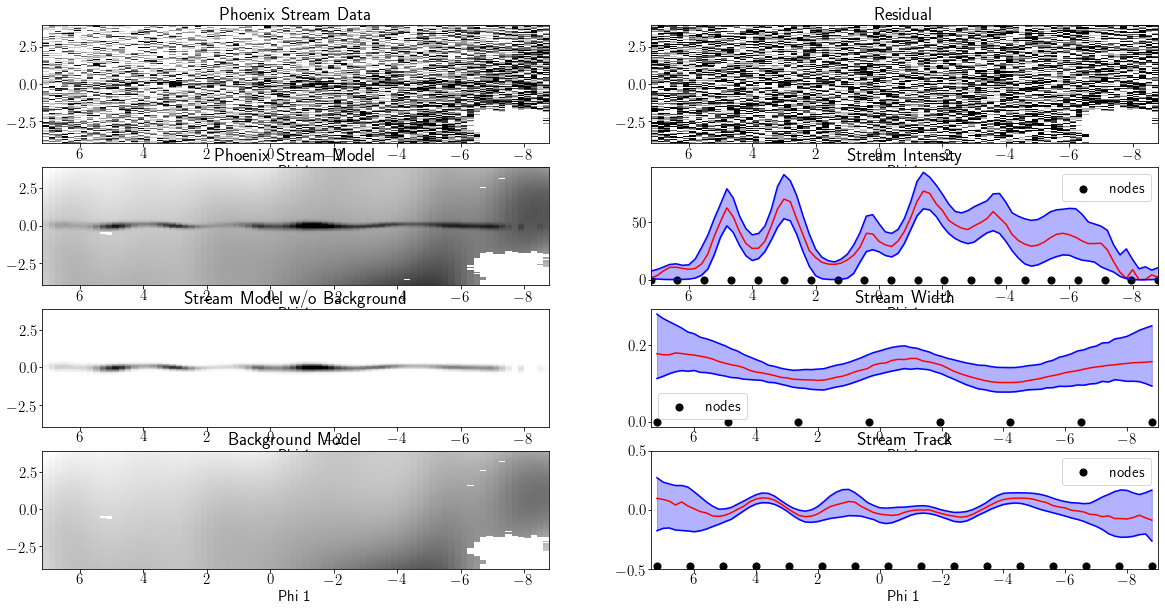

In [8]:
print("Plotting...")
fig, axs = plt.subplots(4,2, figsize=(20,10))

axs[0][0].pcolormesh(pp1, pp2, hh, vmin = 3, vmax = 8, cmap='gray_r')
axs[0][0].set_xlim(7.2, -8.8)
axs[0][0].set_xlabel(r'Phi 1')
axs[0][0].set_title(r'Phoenix Stream Data')

axs[1][0].pcolormesh(pp1, pp2, int_map+bg_map, vmin = 3, vmax = 8, cmap='gray_r')
axs[1][0].set_xlim(7.2, -8.8)
axs[1][0].set_xlabel(r'Phi 1')
axs[1][0].set_title(r'Phoenix Stream Model')

axs[2][0].pcolormesh(pp1, pp2, int_map, vmin = 0, vmax = 4, cmap='gray_r')
axs[2][0].set_xlim(7.2, -8.8)
axs[2][0].set_xlabel(r'Phi 1')
axs[2][0].set_title(r'Stream Model w/o Background')

axs[3][0].pcolormesh(pp1, pp2, bg_map, vmin = 3,vmax = 9, cmap='gray_r')
axs[3][0].set_xlim(7.2, -8.8)
axs[3][0].set_xlabel(r'Phi 1')
axs[3][0].set_title(r'Background Model')

axs[0][1].pcolormesh(pp1, pp2, hh-(int_map+bg_map), vmin = -1.5,vmax = 1.5, cmap='gray_r')
axs[0][1].set_xlim(7.2, -8.8)
axs[0][1].set_xlabel(r'Phi 1')
axs[0][1].set_title(r'Residual')

axs[1][1].plot(pp1[80], int1d_map[80], c = 'r')
axs[1][1].plot(pp1[80], int1d_hi_map[80], c = 'b')
axs[1][1].plot(pp1[80], int1d_lo_map[80], c = 'b')
axs[1][1].fill_between(pp1[80], int1d_lo_map[80], int1d_hi_map[80], alpha = 0.3, color= 'b')
axs[1][1].set_xlim(7.2, -8.8)
axs[1][1].set_xlabel(r'Phi 1')
axs[1][1].scatter(np.linspace(-8.8,7.2,20), np.zeros(20), c = 'k', s = 50, label = 'nodes')
axs[1][1].legend()
axs[1][1].set_title(r'Stream Intensity')

axs[2][1].plot(pp1[80], width_map[80], c = 'r')
axs[2][1].plot(pp1[80], width_hi_map[80], c = 'b')
axs[2][1].plot(pp1[80], width_lo_map[80], c = 'b')
axs[2][1].fill_between(pp1[80], width_lo_map[80], width_hi_map[80], alpha = 0.3, color= 'b')
axs[2][1].set_xlim(7.4, -9)
axs[2][1].set_xlabel(r'Phi 1')
axs[2][1].scatter(np.linspace(-8.8,7.2,8), np.zeros(8),c = 'k', s = 50, label = 'nodes')
axs[2][1].legend()
axs[2][1].set_title(r'Stream Width')

axs[3][1].plot(pp1[80], fi2_map[80], c = 'r')
axs[3][1].plot(pp1[80], fi2_hi_map[80], c = 'b')
axs[3][1].plot(pp1[80], fi2_lo_map[80], c = 'b')
axs[3][1].fill_between(pp1[80], fi2_lo_map[80], fi2_hi_map[80], alpha = 0.3, color= 'b')
axs[3][1].set_xlim(7.4, -9)
axs[3][1].set_ylim(-0.5, 0.5)
axs[3][1].set_xlabel(r'Phi 1')
axs[3][1].scatter(np.linspace(-8.8,7.2,16), np.zeros(16)-0.48,c = 'k', s = 50, label = 'nodes')
axs[3][1].legend()
axs[3][1].set_title(r'Stream Track')
plt.show()

Text(0.5, 1.0, 'Stream Intensity')

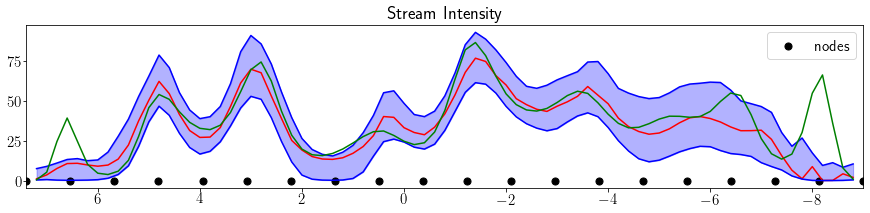

In [9]:
plt.figure(figsize=(15,3))
plt.plot(pp1[80], int1d_map[80], c = 'r')
plt.plot(pp1[80], int1d_hi_map[80], c = 'b')
plt.plot(pp1[80], int1d_lo_map[80], c = 'b')
plt.fill_between(pp1[80], int1d_lo_map[80], int1d_hi_map[80], alpha = 0.3, color= 'b')
plt.plot(pp1[80], int1d_opt[80][:-1], c='g')
plt.xlim(7.4, -9)
plt.scatter(np.linspace(-9,7.4,20), np.zeros(20), c = 'k', s = 50, label = 'nodes')
plt.legend()
plt.title(r'Stream Intensity')

In [10]:
phi1_mem, phi2_mem = np.load('phi1_mem.npy'), np.load('phi2_mem.npy')
phi1_highmem, phi2_highmem = np.load('phi1_highmem.npy'), np.load('phi2_highmem.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'phi1_mem.npy'

NameError: name 'phi1_mem' is not defined

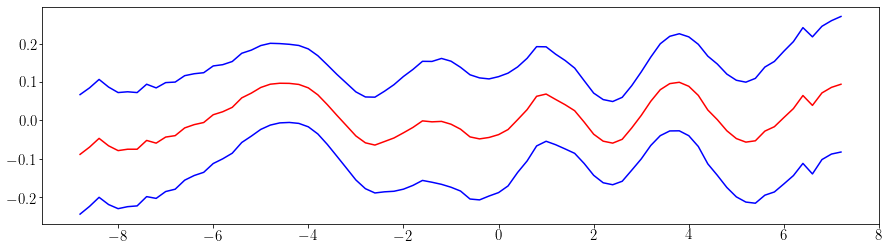

In [11]:
plt.figure(figsize=(15,4))
plt.plot(pp1[80], fi2_map[80], c = 'r')
plt.plot(pp1[80], fi2_map[80] + width_map[80], c = 'b')
plt.plot(pp1[80], fi2_map[80] - width_map[80], c = 'b')
plt.scatter(phi1_mem, phi2_mem, label='lower signal-to-noise members')
plt.scatter(phi1_highmem, phi2_highmem, label='higher signal-to-noise members')
plt.xlim(7.4, -9)
plt.ylim(-0.5, 0.5)
plt.xlabel(r'Phi 1')
plt.title(r'Stream Track and Width')
plt.legend()
plt.title(r'Stream Width')
plt.show()

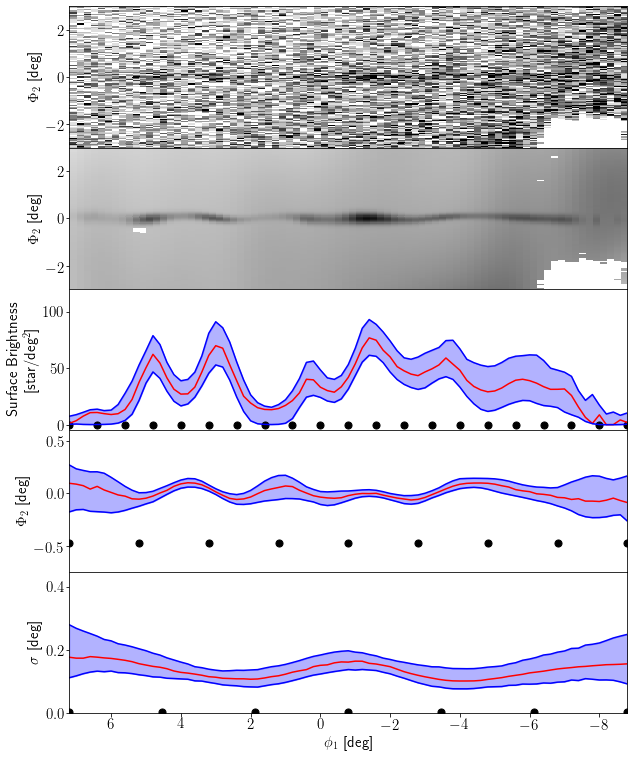

In [12]:
# plot for the paper

fig, axs = plt.subplots(5,1, figsize=(10,13), sharex=True)


axs[0].pcolormesh(pp1, pp2, hh, vmin = 2, vmax = 10, cmap='gray_r')
axs[0].set_xlim(7.2, -8.8)
axs[0].set_ylim(-3, 3)
axs[0].set_ylabel(r'$\Phi_2$ [deg]')


axs[1].pcolormesh(pp1, pp2, int_map+bg_map, vmin = 2, vmax = 10, cmap='gray_r')
axs[1].set_ylim(-3, 3)
axs[1].set_xlim(7.2, -8.8)
axs[1].set_ylabel(r'$\Phi_2$ [deg]')


axs[2].plot(pp1[80], int1d_map[60], c = 'r')
axs[2].plot(pp1[80], int1d_hi_map[60], c = 'b')
axs[2].plot(pp1[0], int1d_lo_map[60], c = 'b')
axs[2].fill_between(pp1[80], int1d_lo_map[60], int1d_hi_map[60], alpha = 0.3, color= 'b')
axs[2].set_ylim(-5, 120)
axs[2].set_ylabel('Surface Brightness \n [star/deg$^2$]')
axs[2].scatter(np.linspace(-8.8,7.2,21), np.zeros(21), c = 'k', s = 50, label = 'nodes')

axs[3].plot(pp1[80], fi2_map[80], c = 'r')
axs[3].plot(pp1[80], fi2_hi_map[80], c = 'b')
axs[3].plot(pp1[80], fi2_lo_map[80], c = 'b')
axs[3].fill_between(pp1[80], fi2_lo_map[80], fi2_hi_map[80], alpha = 0.3, color= 'b')
axs[3].set_ylim(-0.75, 0.6)

axs[3].set_ylabel(r'$\Phi_2$ [deg]')
axs[3].scatter(np.linspace(-8.8,7.2,9), np.zeros(9)-0.48,c = 'k', s = 50, label = 'nodes')


axs[4].plot(pp1[80], width_map[80], c = 'r')
axs[4].plot(pp1[80], width_hi_map[80], c = 'b')
axs[4].plot(pp1[80], width_lo_map[80], c = 'b')
axs[4].fill_between(pp1[80], width_lo_map[80], width_hi_map[80], alpha = 0.3, color= 'b')
axs[4].set_ylim(0, 0.45)
axs[4].set_ylabel(r'$\sigma$ [deg]')
axs[4].set_xlabel(r'$\phi_1$ [deg]')
axs[4].scatter(np.linspace(-8.8,7.2,7), np.zeros(7)+0.005,c = 'k', s = 50, label = 'nodes')
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('model_results.pdf')
plt.show()

In [43]:
int1d_map

array([[1.        , 1.        , 1.        , ..., 7.62211813, 3.65192749,
        1.14201405],
       [1.        , 1.        , 1.        , ..., 7.62211813, 3.65192749,
        1.14201405],
       [1.        , 1.        , 1.        , ..., 7.62211813, 3.65192749,
        1.14201405],
       ...,
       [2.0168886 , 8.6273567 , 0.13970347, ..., 7.62211813, 3.65192749,
        1.14201405],
       [2.0168886 , 8.6273567 , 0.13970347, ..., 7.62211813, 3.65192749,
        1.14201405],
       [2.0168886 , 8.6273567 , 0.13970347, ..., 7.62211813, 3.65192749,
        1.14201405]])

# Atlas

In [7]:
stream = 'atlas_sergey'
if stream == 'atlas_sergey':
    minx, maxx, miny, maxy = -13, 10, -5, 5
    filename = "power_spectra/to_kian.h5"
    with h5py.File(filename, "r") as f:
        hh = f['hh'].value
        hh = hh[20:180]
    

    myrange = [[minx, maxx], [miny, maxy]]

    xgrid = np.linspace(myrange[0][0], myrange[0][1], hh.shape[0] + 1,
                        True)
    xgrid = xgrid[:-1] + .5 * (xgrid[1] - xgrid[0])
    ygrid = np.linspace(myrange[1][0], myrange[1][1], hh.shape[1] + 1,
                    True)
    ygrid = ygrid[:-1] + .5 * (ygrid[1] - ygrid[0])
    pp1 = xgrid[:, None] + ygrid[None, :] * 0
    pp2 = xgrid[:, None] * 0 + ygrid[None, :]
    mask = ~((pp1>3.5) & (pp1<4.5) & (pp2>-2.8) & (pp2<-1.8))
    vv_mask = hh[mask]
    pp1=pp1[mask]
    pp2=pp2[mask]
    print(pp1.shape)
    print(vv_mask.shape)
    np.array(vv_mask).reshape(pp1.shape)

(18920,)
(18920,)


<ipython-input-7-f66b173f89ef>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  hh = f['hh'].value


In [ ]:
test_extract = 1
stream = 'atlas_sergey'
print('open model')
with open("phoenix_models/{}_model_fit_test{}.pickle".format(stream, test_extract), "rb") as f:
    data_dict = pickle.load(f)
    
fit = data_dict['fit']
    
if stream == 'atlas_sergey':
    minx, maxx, miny, maxy = -13, 10, -5, 5
    filename = "power_spectra/to_kian.h5"
    with h5py.File(filename, "r") as f:
        hh = f['hh'].value
        hh = hh[20:180]

    myrange = [[minx, maxx], [miny, maxy]]

    xgrid = np.linspace(myrange[0][0], myrange[0][1], hh.shape[0] + 1,
                        True)
    xgrid = xgrid[:-1] + .5 * (xgrid[1] - xgrid[0])
    ygrid = np.linspace(myrange[1][0], myrange[1][1], hh.shape[1] + 1,
                    True)
    ygrid = ygrid[:-1] + .5 * (ygrid[1] - ygrid[0])
    pp1 = xgrid[:, None] + ygrid[None, :] * 0
    pp2 = xgrid[:, None] * 0 + ygrid[None, :]
    mask = ~((pp1>3.5) & (pp1<4.5) & (pp2>-2.8) & (pp2<-1.8))
    vv_mask = hh[mask]
    pp1=pp1[mask]
    pp2=pp2[mask]
    
else:
    pp1 = np.load('model_arrays/pp1_atlas.npy')
    pp2 = np.load('model_arrays/pp2_atlas.npy')
    vv_mask = np.load('model_arrays/vv_mask_atlas.npy')
    smooth = np.load('model_arrays/smooth_atlas.npy')

print('Getting model values ...')
xmod = fit['xmod']

xmod_interval = np.apply_along_axis(stats.peak_interval, 0, xmod)
mod_mean_peak = xmod_interval[0,:]
mod_mean_hilo = xmod_interval[1,:]

mod_mean_peak = mod_mean_peak.astype('float64')
model_map_log = np.array(mod_mean_peak).reshape(pp1.shape)
model_map = np.e**model_map_log

print('Getting Stream Intensity means ...')
logint_pix = fit['logint_pix']

logint_pix_interval = np.apply_along_axis(stats.peak_interval, 0, logint_pix)
logint_pix_peak = logint_pix_interval[0,:]
logint_pix_hilo = logint_pix_interval[1,:]

logint_mean = logint_pix_peak.astype('float64')
int_map_log = np.array(logint_mean).reshape(pp1.shape)
int_map = np.e**int_map_log

print('Getting Background Intensity means ...')
logbg_pix = fit['logbg_pix']
logbg_pix_interval = np.apply_along_axis(stats.peak_interval, 0, logbg_pix)
logbg_pix_peak = logbg_pix_interval[0,:]
logbg_pix_hilo = logbg_pix_interval[1,:]


bkg_mean = logbg_pix_peak.astype('float64')
bkg_map_log = np.array(bkg_mean).reshape(pp1.shape)
bkg_map = np.e**bkg_map_log  

print("Getting Width means ...")

width_val = fit['width_val']
widthval_interval = np.apply_along_axis(stats.peak_interval, 0, width_val)
widthval_peak = widthval_interval[0,:]
widthval_hilo = widthval_interval[1,:]


wid_mean = widthval_peak.astype('float64')
width_map = np.array(wid_mean).reshape(pp1.shape)

print("Getting Phi 2 means ...")

fi2_val = fit['fi2_val']
fi2val_interval = np.apply_along_axis(stats.peak_interval, 0, fi2_val)
fi2val_peak = fi2val_interval[0,:]
fi2val_hilo = fi2val_interval[1,:]

phi2_mean = fi2val_peak.astype('float64')
fi2_map = np.array(phi2_mean).reshape(pp1.shape)

print("Getting Log Intensity means ...")

logint_val = fit['logint_val']
logint1d_interval = np.apply_along_axis(stats.peak_interval, 0, logint_val)
logint1d_peak = logint1d_interval[0,:]
logint1d_hilo = logint1d_interval[1,:]

int1d_mean = logint1d_peak.astype('float64')
int1d_map_log = np.array(int1d_mean).reshape(pp1.shape)
int1d_map = np.e**int1d_map_log
test_save = test_extract


np.save('model_arrays/model_map_{}_test{}.npy'.format(stream,test_save), model_map)
np.save('model_arrays/int1d_map_{}_test{}.npy'.format(stream,test_save), int1d_map)
np.save('model_arrays/int_map_{}_test{}.npy'.format(stream,test_save), int_map)
np.save('model_arrays/bkg_map_{}_test{}.npy'.format(stream,test_save), bkg_map)
np.save('model_arrays/width_map_{}_test{}.npy'.format(stream,test_save), width_map)
np.save('model_arrays/fi2_map_{}_test{}.npy'.format(stream,test_save), fi2_map)
np.save('model_arrays/int1d_map_{}_test{}.npy'.format(stream,test_save), int1d_map)

open model


<ipython-input-4-b2779cffc09b>:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  hh = f['hh'].value


Getting model values ...


# ATLAS Stream Model

In [19]:
# atlas
test_load = 1
stream = 'atlas_sergey'
if stream == 'atlas_sergey':
    minx, maxx, miny, maxy = -13, 10, -5, 5
    filename = "power_spectra/to_kian.h5"
    with h5py.File(filename, "r") as f:
        hh = f['hh'].value
        hh = hh[20:180]

    myrange = [[minx, maxx], [miny, maxy]]

    xgrid = np.linspace(myrange[0][0], myrange[0][1], hh.shape[0] + 1,
                        True)
    xgrid = xgrid[:-1] + .5 * (xgrid[1] - xgrid[0])
    ygrid = np.linspace(myrange[1][0], myrange[1][1], hh.shape[1] + 1,
                    True)
    ygrid = ygrid[:-1] + .5 * (ygrid[1] - ygrid[0])
    pp1 = xgrid[:, None] + ygrid[None, :] * 0
    pp2 = xgrid[:, None] * 0 + ygrid[None, :]
    mask = ~((pp1>3.5) & (pp1<4.5) & (pp2>-2.8) & (pp2<-1.8))
    vv_mask = hh[mask]
    pp1_copy=pp1[mask]
    pp2_copy=pp2[mask]
    print(pp1_copy)
    print(pp1[0], len(pp1[0]))


#pp1 = np.load('model_arrays/pp1_{}.npy')
#pp2 = np.load('model_arrays/pp2_{}.npy')
#vv_mask = np.load('model_arrays/vv_mask_{}.npy')
#smooth = np.load('model_arrays/smooth_{}.npy')
model_map = np.load('model_arrays/model_map_{}_test{}.npy'.format(stream,test_load))
mod_mean_peak = np.copy(pp1)
mod_mean_peak[mask] = model_map.astype('float64')
model_map = np.array(mod_mean_peak).reshape(pp1.shape)

int_map = np.load('model_arrays/int_map_{}_test{}.npy'.format(stream,test_load))
int_mean = np.copy(pp1)
int_mean[mask] = int_map.astype('float64')
int_map = np.array(logint_mean).reshape(pp1.shape)
             
int1d_map = np.load('model_arrays/int1d_map_{}_test{}.npy'.format(stream,test_load))
int1d_mean = np.copy(pp1)
int1d_mean[mask] = int1d_map.astype('float64')
int1d_map = np.array(int1d_mean).reshape(pp1.shape)
int1d = []
for i in range(len(int1d_map)):
    int1d = np.append(int1d, np.median(int1d_map[i]))

bkg_map = np.load('model_arrays/bkg_map_{}_test{}.npy'.format(stream,test_load))
bkg_mean = np.copy(pp1)
bkg_mean[mask] = bkg_map.astype('float64')
bkg_map = np.array(bkg_mean).reshape(pp1.shape)

width_map = np.load('model_arrays/width_map_{}_test{}.npy'.format(stream,test_load))
wid_mean = np.copy(pp1)
wid_mean[mask] = width_map.astype('float64')
width_map = np.array(wid_mean).reshape(pp1.shape)
width = []
for i in range(len(width_map)):
    width = np.append(width, np.median(width_map[i]))
    
fi2_map = np.load('model_arrays/fi2_map_{}_test{}.npy'.format(stream,test_load))
phi2_mean = np.copy(pp1)
phi2_mean[mask] = fi2_map.astype('float64')
fi2_map = np.array(phi2_mean).reshape(pp1.shape)
fi2 = []
for i in range(len(fi2_map)):
    fi2 = np.append(fi2, np.median(fi2_map[i]))
    

[-12.87894737 -12.87894737 -12.87894737 ...   9.87894737   9.87894737
   9.87894737]
[-12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.87894737
 -12.87894737 -12.87894737 -12.87894737 -12.87894737 -12.

<ipython-input-19-1a8dff4adb4f>:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  hh = f['hh'].value


Plotting...


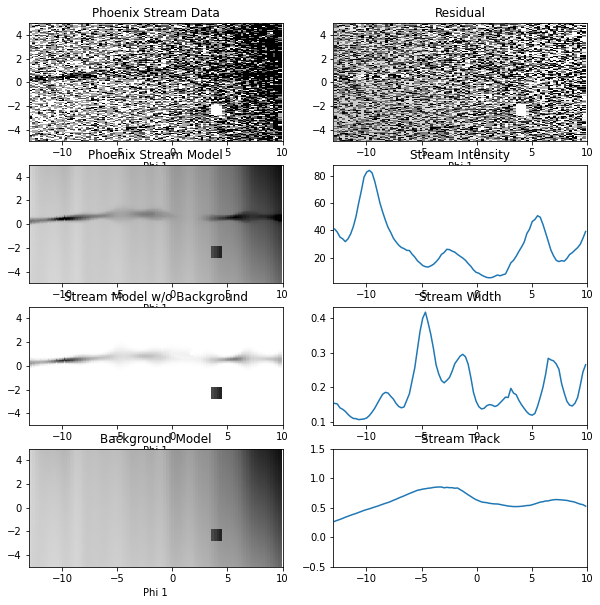

In [34]:
print("Plotting...")
fig, axs = plt.subplots(4,2, figsize=(10,10))

axs[0][0].pcolormesh(pp1, pp2, hh, vmin = 0, vmax = 3, cmap='gray_r')
axs[0][0].set_xlim(-13, 10)
axs[0][0].set_xlabel('Phi 1')
axs[0][0].set_title('Phoenix Stream Data')

axs[1][0].pcolormesh(pp1, pp2, model_map, vmin = 0, vmax = 5, cmap='gray_r')
axs[1][0].set_xlim(-13, 10)
axs[1][0].set_xlabel('Phi 1')
axs[1][0].set_title('Phoenix Stream Model')

axs[2][0].pcolormesh(pp1, pp2, int_map, vmin = 0, vmax =5, cmap='gray_r')
axs[2][0].set_xlim(-13,10)
axs[2][0].set_xlabel('Phi 1')
axs[2][0].set_title('Stream Model w/o Background')

axs[3][0].pcolormesh(pp1, pp2, bkg_map, vmin = 0,vmax = 5, cmap='gray_r')
axs[3][0].set_xlim(-13, 10)
axs[3][0].set_xlabel('Phi 1')
axs[3][0].set_title('Background Model')

axs[0][1].pcolormesh(pp1, pp2, hh-model_map, vmin = -1.5,vmax = 1.5, cmap='gray_r')
axs[0][1].set_xlim(-13,10)
axs[0][1].set_xlabel('Phi 1')
axs[0][1].set_title('Residual')


axs[1][1].plot(pp1[:,0], int1d)
axs[1][1].set_xlim(-13,10)
axs[1][1].set_title('Stream Intensity')

axs[2][1].plot(pp1[:,0], width)
axs[2][1].set_xlim(-13,10)
axs[2][1].set_title('Stream Width')

axs[3][1].plot(pp1[:,0], fi2)
axs[3][1].set_xlim(-13,10)
axs[3][1].set_ylim(-0.5, 1.5)
axs[3][1].set_title('Stream Track')
plt.show()


## Sergey Comparison

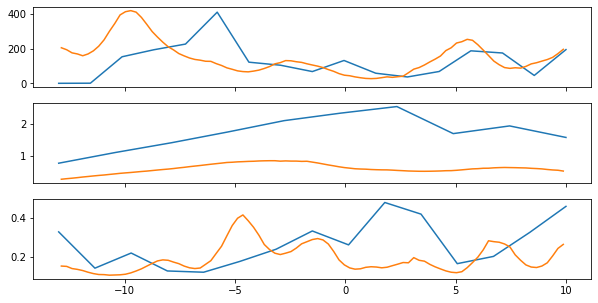

In [29]:
import astropy
from astropy.io import fits
pub_int_atlas = fits.open('phoenix_models/pub_int_atlas.fits')[1].data
pub_track_atlas = fits.open('phoenix_models/pub_track_atlas.fits')[1].data
pub_width_atlas = fits.open('phoenix_models/pub_width_atlas.fits')[1].data


size = len(pub_int_atlas)
#p = np.polyfit(pub_int_atlas['phi1'], np.e**pub_int_atlas['logint_mean'], deg=12)
phi1 = np.linspace(-13,10,100)

fig, ax = plt.subplots(3,1, figsize=(10,5), sharex=True)
ax[0].plot(pub_int_atlas['phi1'], np.e**pub_int_atlas['logint_mean'])
ax[0].plot(pp1[:,0], 5*int1d)
ax[1].plot(pub_track_atlas['phi1'], np.e**pub_track_atlas['phi2_mean'])
ax[1].plot(pp1[:,0], fi2)
ax[2].plot(pub_width_atlas['phi1'], np.e**pub_width_atlas['logwidth_mean'])
ax[2].plot(pp1[:,0], width)
#plt.plot(phi1, np.polyval(p, phi1))